<p style="text-align: center;"><font size="8"><b>More Matplolib</b></font><br>

Last week we saw how to make basic plots using Matplotlib.

Using Matplotlib we can do much more than just basic plots as we will see today.

# Log scale plots

Sometimes we have data which covers a very wide range. For example we might have the data:

    [0.1, 0.2, 0.4, 0.000004, 0.0000005, 1, 10, 1000000, 0.00005]

We can of course plot this on a regular plot.

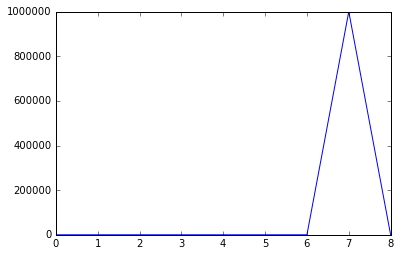

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([0.1, 0.2, 0.4, 0.000004, 0.0000005, 1, 10, 1000000, 0.00005])

This plot is not very easy to read. It is impossible to tell for example if the first data point is larger or smaller than the second.

Instead of plotting the values of the data, we could plot their logarithms using the command `semilogy`.

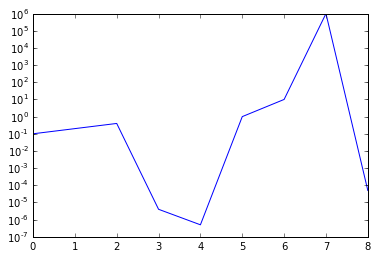

In [6]:
plt.semilogy([0.1, 0.2, 0.4, 0.000004, 0.0000005, 1, 10, 1000000, 0.00005])

You'll notice that now the $y$ axis goes from $10^{-7}$ to $10^6$. Each tic represents a 10 fold increase over the previous tic. Using this plot it is easy to see that the first data point is in fact smaller than the second. 

Here the $y$ data ranged from $10^{-7}$ to $10^6$. Implicitly the $x$ data ranged from 0 to 8. Sometimes we may have the opposite situation, where the $x$ data has a large range, but the $y$ data does not. In this case we can use the `semilogx` command.

Other times we may have both the $x$ and $y$ data covering large ranges. In that case we can make both axes log axes by using the `loglog` command.

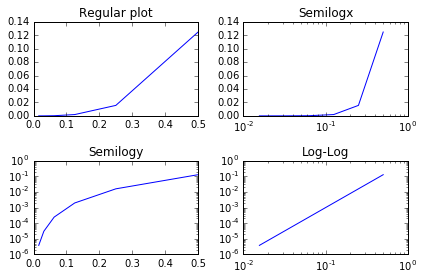

In [9]:
import numpy as np
x = np.array([1/2, 1/4, 1/8, 1/16, 1/32, 1/64])
y = x**3
plt.subplot(2,2,1)
plt.title("Regular plot")
plt.plot(x,y)
plt.subplot(2,2,2)
plt.title("Semilogx")
plt.semilogx(x,y)
plt.subplot(2,2,3)
plt.title("Semilogy")
plt.semilogy(x,y)
plt.subplot(2,2,4)
plt.title("Log-Log")
plt.loglog(x,y)
plt.tight_layout()

## Exercise

Plot the day length in hours of all 8 planets. Use a subplot. Make the top plot a regular plot and the bottom plot a log plot.

In [15]:
day_length = [1408, 5832, 24, 25, 10, 11, 17, 16]

# Contour Plots

We often need to plot functions in more than one dimension. One way to visualize functions defined on a 2D region is through contour plots.

![contour map](images/contour_map.gif)

Here each line represents a line of constant temperature.

Suppose we are given the function 

$$ z(x,y) = \sin(x)\cos^2(y).$$

What does this function look like? 

We can use the contour command to create a contour plot. To do this, we will need the following:
* a collections of x and y values
* a collection of a single z value for each (x,y) pair

This is annalagous to the 1D case where we used linspace to sample the interval and evaluated the function at every sample point.

So we have to create a collection of points in the $x-y$ plane. 

We can do this by using a numpy command called `meshgrid`. Meshgrid takes in two 1D arrays and returns two 2D arrays that contain the possible pairs of points in the two 1D arrays.

For example, if we pass in the arrays $x = [1,2,3]$ and $y = [4,5,6,7]$, we would get the arrays

$$X = \begin{bmatrix} 1 & 2 & 3\\1 & 2 & 3\\ 1 & 2 & 3\\ 1 & 2 & 3\end{bmatrix},$$

$$Y = \begin{bmatrix} 4 & 4 & 4\\ 5& 5& 5\\6 & 6 & 6\\7 & 7& 7\end{bmatrix}.$$

![meshgrid](images/meshgrid.jpg)

<a list of 20 text.Text objects>

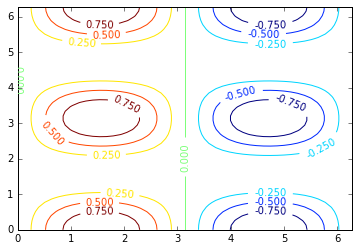

In [43]:
x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

CS = plt.contour(X,Y,np.sin(X)*np.cos(Y)**2)
plt.clabel(CS)

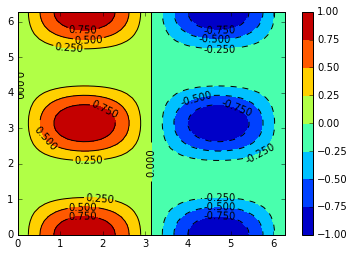

In [38]:
x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

CS = plt.contourf(X,Y,np.sin(X)*np.cos(Y)**2)
CS1 = plt.contour(X,Y,np.sin(X)*np.cos(Y)**2, colors="k")
plt.clabel(CS1)
plt.colorbar(CS)

# 3D plots


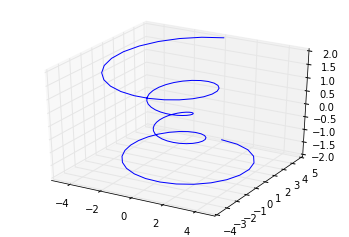

In [53]:
from mpl_toolkits.mplot3d import Axes3D

plt.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
plt.plot(x, y, z)

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_surface'

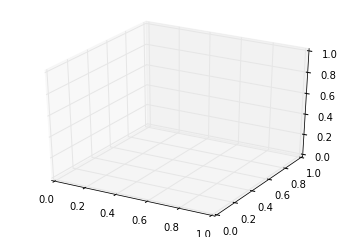

In [55]:
plt.gca(projection='3d')
plt.plot_surface(X,Y,np.sin(X)*np.cos(Y)**2)

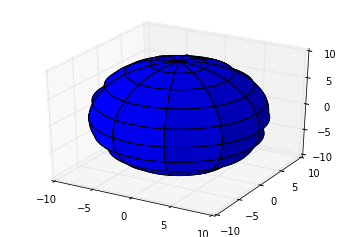

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b')